<a href="https://colab.research.google.com/github/YahyaHabib/-Water---contaminants-and-levels/blob/main/Water_levels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heatmap for Raw data**

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
wastewater_data = pd.read_excel('/content/Wastewater Discharges Per Year Per Country.xlsx', sheet_name='Sheet1')
water_quality_df = pd.read_excel('/content/Proportion of bodies of water with good ambient water quality.xlsx')
mortality_rate_data = pd.read_excel('/content/Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) (2).xlsx')


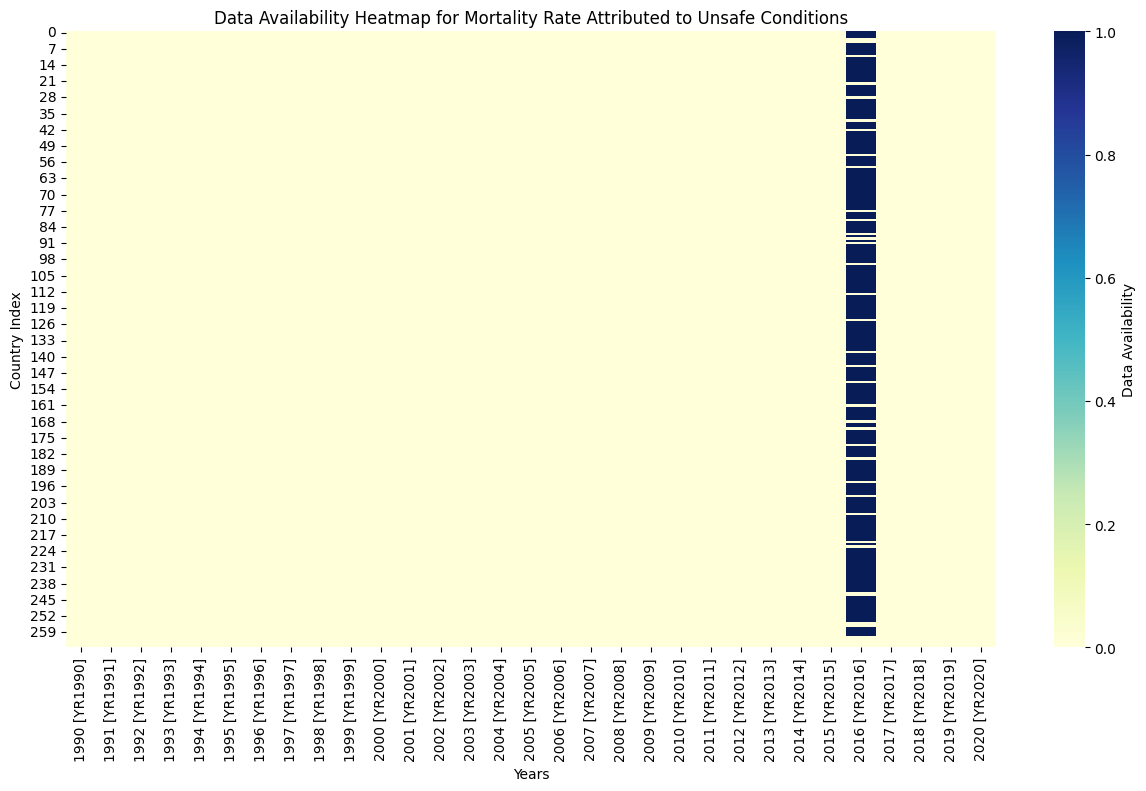

In [26]:
mortality_rate_df = mortality_rate_data.replace('..', pd.NA)

# Check for data availability (not NaN) and convert to integer (1 for available, 0 for not available)
data_availability = mortality_rate_df.iloc[:, 4:].notna().astype(int)

# Create a heatmap to visualize data availability
plt.figure(figsize=(15, 8))
sns.heatmap(data_availability, cmap="YlGnBu", cbar_kws={'label': 'Data Availability'})
plt.title('Data Availability Heatmap for Mortality Rate Attributed to Unsafe Conditions')
plt.xlabel('Years')
plt.ylabel('Country Index')
plt.show()

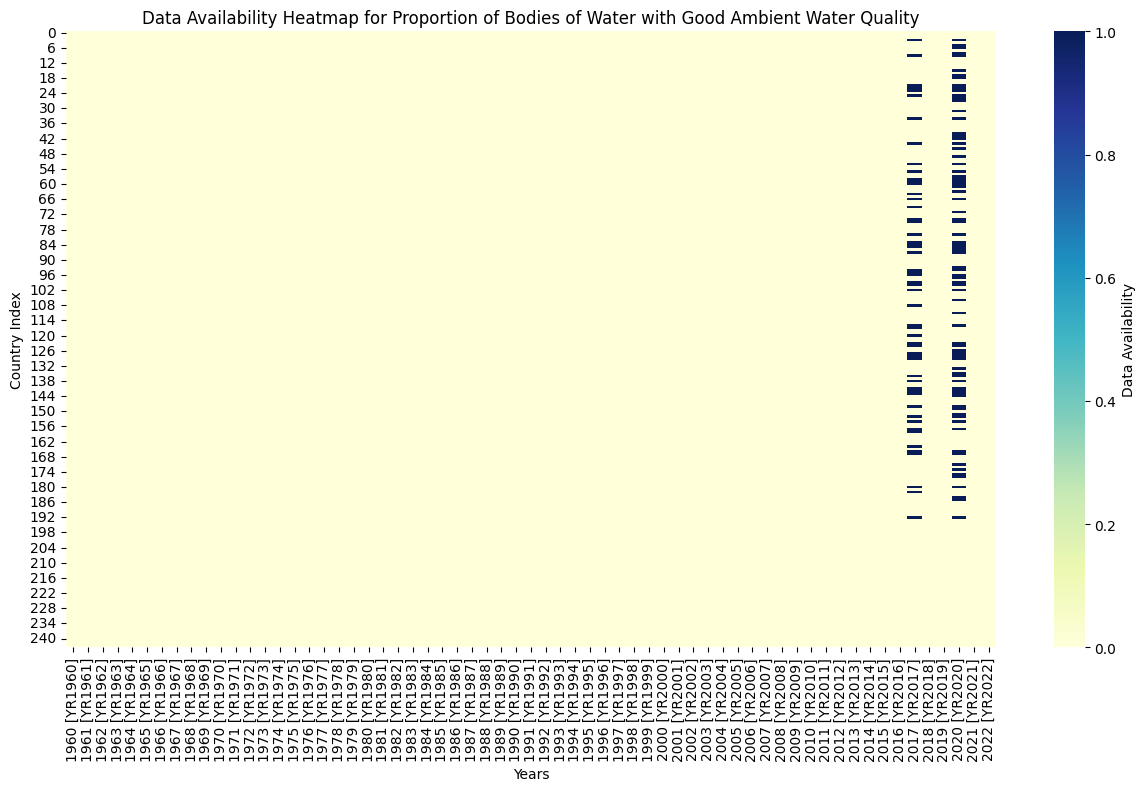

In [27]:
# Replacing '..' with NaN and checking data availability
water_quality_df = water_quality_df.replace('..', pd.NA)

# Check for data availability (not NaN) and convert to integer (1 for available, 0 for not available)
data_availability = water_quality_df.iloc[:, 4:].notna().astype(int)

# Create a heatmap to visualize data availability
plt.figure(figsize=(15, 8))
sns.heatmap(data_availability, cmap="YlGnBu", cbar_kws={'label': 'Data Availability'})
plt.title('Data Availability Heatmap for Proportion of Bodies of Water with Good Ambient Water Quality')
plt.xlabel('Years')
plt.ylabel('Country Index')
plt.show()


# **Data Cleaning**


# Annual Freshwater Withdrawls

In [28]:
freshwater_withdrawals_df = pd.read_csv('annual-freshwater-withdrawals.csv')

In [29]:
freshwater_withdrawals_df.head(10)

,Entity,Code,Year,"Annual freshwater withdrawals, total (billion cubic meters)"
0,Afghanistan,AFG,1975,1.070000e+10
1,Afghanistan,AFG,1976,1.198426e+10
2,Afghanistan,AFG,1977,1.326852e+10
3,Afghanistan,AFG,1978,1.455278e+10
4,Afghanistan,AFG,1979,1.583703e+10
5,Afghanistan,AFG,1980,1.712129e+10
6,Afghanistan,AFG,1981,1.840555e+10
7,Afghanistan,AFG,1982,1.968981e+10
8,Afghanistan,AFG,1983,2.097407e+10
9,Afghanistan,AFG,1984,2.225833e+10


In [30]:
freshwater_withdrawals_df.duplicated().sum()

0

In [31]:
freshwater_withdrawals_df.isnull().sum()

Entity                                                          0
Code                                                           78
Year                                                            0
Annual freshwater withdrawals, total (billion cubic meters)     0
dtype: int64

In [32]:
missing_code_rows = freshwater_withdrawals_df[freshwater_withdrawals_df['Code'].isnull()]

missing_code_rows.sample(20)

,Entity,Code,Year,"Annual freshwater withdrawals, total (billion cubic meters)"
4948,Sub-Saharan Africa (WB),NaN,2014,1.230250e+11
1478,East Asia and Pacific (WB),NaN,2017,1.236630e+12
3941,North America (WB),NaN,2016,4.803880e+11
1734,Europe and Central Asia (WB),NaN,2019,4.923330e+11
3508,Middle-income countries,NaN,2018,2.885400e+12
1736,European Union (27),NaN,2015,1.927600e+11
4950,Sub-Saharan Africa (WB),NaN,2016,1.274010e+11
3120,Lower-middle-income countries,NaN,2016,1.643930e+12
4831,South Asia (WB),NaN,2016,9.262080e+11
4829,South Asia (WB),NaN,2014,9.213080e+11


In [33]:
# Replace missing values in the 'Code' column with 'N/A'
freshwater_withdrawals_df['Code'].fillna('N/A', inplace=True)

In [34]:
freshwater_withdrawals_df.isnull().sum()

Entity                                                         0
Code                                                           0
Year                                                           0
Annual freshwater withdrawals, total (billion cubic meters)    0
dtype: int64

In [35]:
freshwater_withdrawals_df.dtypes

Entity                                                          object
Code                                                            object
Year                                                             int64
Annual freshwater withdrawals, total (billion cubic meters)    float64
dtype: object

In [36]:
# List unique entities to check for inconsistencies
unique_entities = freshwater_withdrawals_df['Entity'].unique()
sorted(unique_entities)


['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Asia and Pacific (WB)',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe and Central Asia (WB)',
 'European Union (27)',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guate

In [37]:
freshwater_withdrawals_df.to_csv('freshwater_withdrawals_cleaned.csv', index=False)


 # Premature Deaths

In [38]:
premature_deaths_df = pd.read_excel('Premature_deaths_due_to_UNSAFE_WASH.xlsx', sheet_name='Sheet1')

In [39]:
premature_deaths_df.head(10)

,Country,Year,Premature_Death_Count,Risk,Health_Impact
0,Afghanistan,1990,11325,Unsafe WASH,High
1,Afghanistan,1995,22587,Unsafe WASH,High
2,Afghanistan,2000,25647,Unsafe WASH,High
3,Afghanistan,2005,25683,Unsafe WASH,High
4,Afghanistan,2006,23302,Unsafe WASH,High
5,Afghanistan,2007,21118,Unsafe WASH,High
6,Afghanistan,2008,18886,Unsafe WASH,High
7,Afghanistan,2009,16962,Unsafe WASH,High
8,Afghanistan,2010,15958,Unsafe WASH,High
9,Afghanistan,2011,14944,Unsafe WASH,High


In [40]:
premature_deaths_df.isnull().sum()

Country                  0
Year                     0
Premature_Death_Count    0
Risk                     0
Health_Impact            0
dtype: int64

In [41]:
premature_deaths_df.duplicated().sum()

0

In [42]:
unique_countries = premature_deaths_df['Country'].unique()
sorted(unique_countries)

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 "China (People's Republic of)",
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "CÃ´te d'Ivoire",
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Ghana',
 'Greece',
 'Grenada',
 'Guinea-Bissau']

In [43]:
premature_deaths_df['Health_Impact'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [44]:
premature_deaths_df.to_csv('premature_deaths_cleaned.csv', index=False)


# Wastewater Discharges

In [45]:
wastewater_data = pd.read_excel('/content/Wastewater Discharges Per Year Per Country.xlsx', sheet_name='Sheet1')
wastewater_data.head(20)


,Country,Year,Total discharges to Inland waters(million m3),Total discharges to the sea(million m3),"Agricultural (incl. forestry + fisheries) wastewater, all sources, direct discharges(million m3)","Urban wastewater, all sources, discharged without treatment(million m3)","Industrial wastewater, all sources, discharged without treatment(million m3)"
0,Austria,2016,2386.91,0.00,13.50,151.840,39.9247
1,Austria,2018,2314.91,0.00,13.50,137.270,614.5000
2,Austria,2019,2358.63,0.00,13.50,107.550,614.5000
3,Austria,2020,2345.61,0.00,13.50,107.550,39.9247
4,Austria,2021,1505.78,0.00,4.30,112.920,39.9247
5,Czechia,2000,1429.10,383.00,1.40,63.960,19.7575
6,Czechia,2005,1309.80,62.47,1.50,79.420,0.0000
7,Czechia,2010,1367.40,15.78,7.20,121.079,39.9247
8,Czechia,2015,1115.60,0.00,3.40,151.840,56.2500
9,Czechia,2016,1133.90,330.00,4.30,151.840,103.5700


In [46]:
wastewater_data.isnull().sum()

Country                                                                                             0
Year                                                                                                0
Total discharges to Inland waters(million m3)                                                       0
Total discharges to the sea(million m3)                                                             0
Agricultural (incl. forestry + fisheries) wastewater, all sources, direct discharges(million m3)    0
Urban wastewater, all sources, discharged without treatment(million m3)                             0
Industrial wastewater, all sources, discharged without treatment(million m3)                        0
dtype: int64

In [47]:
wastewater_data.duplicated().sum()

0

In [48]:
wastewater_data.to_csv('wastewater_cleaned.csv', index=False)


# Water Quality

In [49]:
water_quality_df = pd.read_excel('/content/Proportion of bodies of water with good ambient water quality.xlsx')

water_quality_df.head(15)


,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Afghanistan,AFG,Proportion of bodies of water with good ambien...,EN.H2O.BDYS.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,Albania,ALB,Proportion of bodies of water with good ambien...,EN.H2O.BDYS.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,Algeria,DZA,Proportion of bodies of water with good ambien...,EN.H2O.BDYS.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,Andorra,AND,Proportion of bodies of water with good ambien...,EN.H2O.BDYS.ZS,..,..,..,..,..,..,...,..,..,..,..,92.9,..,..,86,..,..
4,Angola,AGO,Proportion of bodies of water with good ambien...,EN.H2O.BDYS.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
5,Antigua and Barbuda,ATG,Proportion of bodies of water with good ambien...,EN.H2O.BDYS.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,0,..,..
6,Argentina,ARG,Proportion of bodies of water with good ambien...,EN.H2O.BDYS.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,18,..,..
7,Armenia,ARM,Proportion of bodies of water with good ambien...,EN.H2O.BDYS.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
8,Australia,AUS,Proportion of bodies of water with good ambien...,EN.H2O.BDYS.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,87.7,..,..
9,Austria,AUT,Proportion of bodies of water with good ambien...,EN.H2O.BDYS.ZS,..,..,..,..,..,..,...,..,..,..,..,80.4,..,..,81.8,..,..


In [50]:
water_quality_df.replace("..", pd.NA, inplace=True)

In [51]:
water_quality_df.duplicated().sum()

2

In [52]:
water_quality_df[water_quality_df.duplicated()]

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Remove duplicate records
water_quality_df.drop_duplicates(inplace=True)

In [54]:
water_quality_df.isnull().sum()


Country Name       1
Country Code       3
Series Name        3
Series Code        3
1960 [YR1960]    242
                ... 
2018 [YR2018]    242
2019 [YR2019]    242
2020 [YR2020]    162
2021 [YR2021]    242
2022 [YR2022]    242
Length: 67, dtype: int64

In [55]:
# Transform the dataset from wide to long format
water_quality_long_df = pd.melt(water_quality_df, id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
                                var_name='Year', value_name='Proportion of Good Water Quality')

In [56]:
# Extract year from the 'Year' column (which currently includes the year and a string '[YRYEAR]')
water_quality_long_df['Year'] = water_quality_long_df['Year'].str.extract('(\d+)').astype(int)

water_quality_long_df.head()

,Country Name,Country Code,Series Name,Series Code,Year,Proportion of Good Water Quality
0,Afghanistan,AFG,Proportion of bodies of water with good ambien...,EN.H2O.BDYS.ZS,1960,<NA>
1,Albania,ALB,Proportion of bodies of water with good ambien...,EN.H2O.BDYS.ZS,1960,<NA>
2,Algeria,DZA,Proportion of bodies of water with good ambien...,EN.H2O.BDYS.ZS,1960,<NA>
3,Andorra,AND,Proportion of bodies of water with good ambien...,EN.H2O.BDYS.ZS,1960,<NA>
4,Angola,AGO,Proportion of bodies of water with good ambien...,EN.H2O.BDYS.ZS,1960,<NA>


In [57]:
# Keeping only rows with non-null values in the 'Proportion of Good Water Quality' column
water_quality_filtered_df = water_quality_long_df.dropna(subset=['Proportion of Good Water Quality'])

water_quality_filtered_df[water_quality_filtered_df['Proportion of Good Water Quality']<=0]

,Country Name,Country Code,Series Name,Series Code,Year,Proportion of Good Water Quality
14525,Antigua and Barbuda,ATG,Proportion of bodies of water with good ambien...,EN.H2O.BDYS.ZS,2020,0
14700,Uganda,UGA,Proportion of bodies of water with good ambien...,EN.H2O.BDYS.ZS,2020,0


In [58]:
# Filter out rows where 'Proportion of Good Water Quality' is less than or equal to 0
water_quality_df = water_quality_filtered_df[~(water_quality_filtered_df['Proportion of Good Water Quality'] <= 0)]


In [59]:
water_quality_filtered_df.to_csv('water_quality_cleaned.csv', index=False)


# Death Rate Per 100k

In [60]:
death_rate_data = pd.read_csv('/content/death-rates-unsafe-water.csv')

# Display the first few rows of the dataset and its info to understand its structure
death_rate_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 4 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Entity                                                                                                                     6840 non-null   object 
 1   Code                                                                                                                       6150 non-null   object 
 2   Year                                                                                                                       6840 non-null   int64  
 3   Deaths that are from all causes attributed to unsafe water source per 100,000 people, in both sexes aged age-standardized  6840 n

In [61]:
death_rate_data.head(5)

,Entity,Code,Year,"Deaths that are from all causes attributed to unsafe water source per 100,000 people, in both sexes aged age-standardized"
0,Afghanistan,AFG,1990,19.733002
1,Afghanistan,AFG,1991,19.332512
2,Afghanistan,AFG,1992,19.326250
3,Afghanistan,AFG,1993,23.127151
4,Afghanistan,AFG,1994,22.089624


In [62]:
death_rate_data.isnull().sum()

Entity                                                                                                                         0
Code                                                                                                                         690
Year                                                                                                                           0
Deaths that are from all causes attributed to unsafe water source per 100,000 people, in both sexes aged age-standardized      0
dtype: int64

In [63]:
death_rate_data.duplicated().sum()


0

In [64]:
# Display rows with missing 'Code' values to investigate possible reasons
missing_code_rows = death_rate_data[death_rate_data['Code'].isnull()]

# Show unique entities with missing codes to understand if there's a pattern
unique_entities_missing_code = missing_code_rows['Entity'].unique()

missing_code_rows.head()


,Entity,Code,Year,"Deaths that are from all causes attributed to unsafe water source per 100,000 people, in both sexes aged age-standardized"
30,African Region (WHO),NaN,1990,159.53082
31,African Region (WHO),NaN,1991,158.74440
32,African Region (WHO),NaN,1992,154.51102
33,African Region (WHO),NaN,1993,151.23440
34,African Region (WHO),NaN,1994,151.40215


In [65]:
unique_entities_missing_code

array(['African Region (WHO)', 'East Asia & Pacific (WB)',
       'Eastern Mediterranean Region (WHO)', 'England',
       'Europe & Central Asia (WB)', 'European Region (WHO)', 'G20',
       'High Income (WB)', 'Latin America & Caribbean (WB)',
       'Low Income (WB)', 'Lower Middle Income (WB)',
       'Middle East & North Africa (WB)', 'Middle Income (WB)',
       'North America (WB)', 'Northern Ireland', 'OECD Countries',
       'Region of the Americas (WHO)', 'Scotland', 'South Asia (WB)',
       'South-East Asia Region (WHO)', 'Sub-Saharan Africa (WB)', 'Wales',
       'Western Pacific Region (WHO)'], dtype=object)

In [66]:
# Replace missing 'Code' values with 'N/A'
death_rate_data['Code'].fillna('N/A', inplace=True)
# verify if they are still missing
death_rate_data[death_rate_data['Code'].isnull()]



,Entity,Code,Year,"Deaths that are from all causes attributed to unsafe water source per 100,000 people, in both sexes aged age-standardized"


In [67]:
# Update the column name to be more descriptive
death_rate_data.columns = ['Entity', 'Code', 'Year', 'Unsafe Water Death Rate per 100k']

# Verify the updated column name
death_rate_data.head()


,Entity,Code,Year,Unsafe Water Death Rate per 100k
0,Afghanistan,AFG,1990,19.733002
1,Afghanistan,AFG,1991,19.332512
2,Afghanistan,AFG,1992,19.326250
3,Afghanistan,AFG,1993,23.127151
4,Afghanistan,AFG,1994,22.089624


In [68]:
# Check year range
year_range = death_rate_data['Year'].min(), death_rate_data['Year'].max()
year_range


(1990, 2019)

In [69]:
death_rate_range = death_rate_data['Unsafe Water Death Rate per 100k'].min(), death_rate_data['Unsafe Water Death Rate per 100k'].max()
death_rate_anomalies = death_rate_data[death_rate_data['Unsafe Water Death Rate per 100k'] < 0]

death_rate_anomalies, death_rate_range,

(Empty DataFrame
 Columns: [Entity, Code, Year, Unsafe Water Death Rate per 100k]
 Index: [],
 (0.0018974345, 428.71814))

In [70]:
unique_countries = death_rate_data['Entity'].unique()
sorted(unique_countries)

['Afghanistan',
 'African Region (WHO)',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Asia & Pacific (WB)',
 'East Timor',
 'Eastern Mediterranean Region (WHO)',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe & Central Asia (WB)

In [71]:
death_rate_data.to_csv('death_rate_cleaned.csv', index=False)


# **Data Integration**


In [72]:
wastewater_cleaned_df = pd.read_csv('/content/wastewater_cleaned.csv')
premature_deaths_cleaned_df = pd.read_csv('/content/premature_deaths_cleaned.csv')
death_rate_cleaned_df = pd.read_csv('/content/death_rate_cleaned.csv')
freshwater_withdrawals_cleaned_df = pd.read_csv('/content/freshwater_withdrawals_cleaned.csv')

In [73]:
# Merge fresh water withdrwals with death rate
merged_df = pd.merge(death_rate_cleaned_df, freshwater_withdrawals_cleaned_df, on=['Entity', 'Year'], how='inner')

merged_df.head()

,Entity,Code_x,Year,Unsafe Water Death Rate per 100k,Code_y,"Annual freshwater withdrawals, total (billion cubic meters)"
0,Afghanistan,AFG,1990,19.733002,AFG,2.452134e+10
1,Afghanistan,AFG,1991,19.332512,AFG,2.399047e+10
2,Afghanistan,AFG,1992,19.326250,AFG,2.346032e+10
3,Afghanistan,AFG,1993,23.127151,AFG,2.293016e+10
4,Afghanistan,AFG,1994,22.089624,AFG,2.240000e+10


In [74]:
merged_df.shape

(4832, 6)

In [75]:
merged_df.isnull().sum()

Entity                                                          0
Code_x                                                         18
Year                                                            0
Unsafe Water Death Rate per 100k                                0
Code_y                                                         18
Annual freshwater withdrawals, total (billion cubic meters)     0
dtype: int64

In [76]:
# Dropping the 'Code_x' and 'Code_y' columns from the merged dataset
merged_df = merged_df.drop(columns=['Code_x', 'Code_y'])

merged_df.head(5)

,Entity,Year,Unsafe Water Death Rate per 100k,"Annual freshwater withdrawals, total (billion cubic meters)"
0,Afghanistan,1990,19.733002,2.452134e+10
1,Afghanistan,1991,19.332512,2.399047e+10
2,Afghanistan,1992,19.326250,2.346032e+10
3,Afghanistan,1993,23.127151,2.293016e+10
4,Afghanistan,1994,22.089624,2.240000e+10


In [77]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4832 entries, 0 to 4831
Data columns (total 4 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Entity                                                       4832 non-null   object 
 1   Year                                                         4832 non-null   int64  
 2   Unsafe Water Death Rate per 100k                             4832 non-null   float64
 3   Annual freshwater withdrawals, total (billion cubic meters)  4832 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 188.8+ KB


In [78]:
# Rename the 'Country' column to 'Entity' to match the merged dataset
premature_deaths_cleaned_df = premature_deaths_cleaned_df.rename(columns={'Country': 'Entity'})

# Merge the new dataset with the existing merged dataset
merged_df_2 = pd.merge(merged_df, premature_deaths_cleaned_df, on=['Entity', 'Year'], how='inner')

# Display the first few rows of the final merged dataset to verify
merged_df_2.head(20)


,Entity,Year,Unsafe Water Death Rate per 100k,"Annual freshwater withdrawals, total (billion cubic meters)",Premature_Death_Count,Risk,Health_Impact
0,Afghanistan,1990,19.733002,2.452134e+10,11325,Unsafe WASH,High
1,Afghanistan,1995,24.525007,2.186985e+10,22587,Unsafe WASH,High
2,Afghanistan,2000,27.799639,2.028200e+10,25647,Unsafe WASH,High
3,Afghanistan,2005,23.512026,2.028200e+10,25683,Unsafe WASH,High
4,Afghanistan,2006,21.261396,2.028200e+10,23302,Unsafe WASH,High
5,Afghanistan,2007,18.880657,2.028200e+10,21118,Unsafe WASH,High
6,Afghanistan,2008,16.458422,2.028200e+10,18886,Unsafe WASH,High
7,Afghanistan,2009,14.405564,2.028200e+10,16962,Unsafe WASH,High
8,Afghanistan,2010,13.056941,2.028200e+10,15958,Unsafe WASH,High
9,Afghanistan,2011,11.792764,2.028200e+10,14944,Unsafe WASH,High


In [79]:
merged_df_2.shape

(967, 7)

In [80]:
merged_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 0 to 966
Data columns (total 7 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Entity                                                       967 non-null    object 
 1   Year                                                         967 non-null    int64  
 2   Unsafe Water Death Rate per 100k                             967 non-null    float64
 3   Annual freshwater withdrawals, total (billion cubic meters)  967 non-null    float64
 4   Premature_Death_Count                                        967 non-null    int64  
 5   Risk                                                         967 non-null    object 
 6   Health_Impact                                                967 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 60.4+ KB


In [81]:
# Rename the 'Country' column to 'Entity' to match the existing merged dataset
wastewater_cleaned_df = wastewater_cleaned_df.rename(columns={'Country': 'Entity'})

# Merge the new dataset with the existing merged dataset
final_merged = pd.merge(merged_df_2, wastewater_cleaned_df, on=['Entity', 'Year'], how='inner')




In [82]:
final_merged.head(3)

,Entity,Year,Unsafe Water Death Rate per 100k,"Annual freshwater withdrawals, total (billion cubic meters)",Premature_Death_Count,Risk,Health_Impact,Total discharges to Inland waters(million m3),Total discharges to the sea(million m3),"Agricultural (incl. forestry + fisheries) wastewater, all sources, direct discharges(million m3)","Urban wastewater, all sources, discharged without treatment(million m3)","Industrial wastewater, all sources, discharged without treatment(million m3)"
0,Australia,2015,0.097003,9.220000e+09,130,Unsafe WASH,Medium,367.0310,1374.1770,0.5,121.079,55.00
1,Australia,2016,0.093135,1.062300e+10,133,Unsafe WASH,Medium,372.3510,1327.7720,974.1,121.079,62.34
2,Australia,2017,0.089602,1.205864e+10,133,Unsafe WASH,Medium,379.4445,1449.9057,242.6,151.840,72.18


In [83]:
final_merged['Year'].value_counts()

2016    11
2019    11
2017    10
2018    10
2010    10
2015     9
2005     7
2000     5
1990     2
Name: Year, dtype: int64

In [84]:
# Check countries with consecutive data from 2015 to 2019
years_required = set(range(2015, 2020))  # Create a set of years from 2015 to 2019

# Filter groups by those that have all the required years
countries_with_consecutive_data = final_merged.groupby('Entity').filter(lambda x: set(x['Year']) >= years_required)['Entity'].unique()

# Display the countries with consecutive data from 2015 to 2019
countries_with_consecutive_data


array(['Australia', 'Belarus', 'Belgium', 'Bulgaria', 'Croatia',
       'Czechia', 'Denmark', 'Estonia'], dtype=object)

In [85]:
# Find the years available for each country
years_per_country = final_merged.groupby('Entity')['Year'].apply(list)

years_per_country


Entity
Australia                        [2015, 2016, 2017, 2018, 2019]
Austria                                [2010, 2016, 2018, 2019]
Belarus                    [2010, 2015, 2016, 2017, 2018, 2019]
Belgium        [2000, 2005, 2010, 2015, 2016, 2017, 2018, 2019]
Brazil               [1990, 2000, 2005, 2010, 2015, 2016, 2017]
Bulgaria      [1990, 2000, 2005, 2010, 2015, 2016, 2017, 201...
Canada                                                   [2005]
Chile                                                    [2010]
Costa Rica                             [2016, 2017, 2018, 2019]
Croatia              [2005, 2010, 2015, 2016, 2017, 2018, 2019]
Czechia        [2000, 2005, 2010, 2015, 2016, 2017, 2018, 2019]
Denmark                    [2010, 2015, 2016, 2017, 2018, 2019]
Estonia        [2000, 2005, 2010, 2015, 2016, 2017, 2018, 2019]
France                                                   [2019]
Name: Year, dtype: object

In [86]:
# Subset the dataset to include only the specified countries
countries_to_include = [
    'Australia',
    'Belarus',
    'Belgium',
    'Bulgaria',
    'Croatia',
    'Czechia',
    'Denmark',
    'Estonia',
    'Costa Rica'
]

subset_df = final_merged[final_merged['Entity'].isin(countries_to_include)]

subset_df.head()


,Entity,Year,Unsafe Water Death Rate per 100k,"Annual freshwater withdrawals, total (billion cubic meters)",Premature_Death_Count,Risk,Health_Impact,Total discharges to Inland waters(million m3),Total discharges to the sea(million m3),"Agricultural (incl. forestry + fisheries) wastewater, all sources, direct discharges(million m3)","Urban wastewater, all sources, discharged without treatment(million m3)","Industrial wastewater, all sources, discharged without treatment(million m3)"
0,Australia,2015,0.097003,9.220000e+09,130,Unsafe WASH,Medium,367.0310,1374.1770,0.5000,121.079,55.00
1,Australia,2016,0.093135,1.062300e+10,133,Unsafe WASH,Medium,372.3510,1327.7720,974.1000,121.079,62.34
2,Australia,2017,0.089602,1.205864e+10,133,Unsafe WASH,Medium,379.4445,1449.9057,242.6000,151.840,72.18
3,Australia,2018,0.087649,1.242540e+10,135,Unsafe WASH,Medium,324.3432,1359.3658,169.3235,151.840,55.00
4,Australia,2019,0.085156,9.782612e+09,138,Unsafe WASH,Medium,303.2444,1352.0805,38.5000,107.550,55.00


In [87]:
# Further filter the subset to keep only the years from 2015 to 2019
subset_df_2015_2019 = subset_df[(subset_df['Year'] >= 2015) & (subset_df['Year'] <= 2019)]

subset_df_2015_2019.tail(5)


,Entity,Year,Unsafe Water Death Rate per 100k,"Annual freshwater withdrawals, total (billion cubic meters)",Premature_Death_Count,Risk,Health_Impact,Total discharges to Inland waters(million m3),Total discharges to the sea(million m3),"Agricultural (incl. forestry + fisheries) wastewater, all sources, direct discharges(million m3)","Urban wastewater, all sources, discharged without treatment(million m3)","Industrial wastewater, all sources, discharged without treatment(million m3)"
69,Estonia,2015,0.046188,1.615343e+09,5,Unsafe WASH,Low,213.42,70.70,48.81,52.10,51.25
70,Estonia,2016,0.048265,1.751400e+09,5,Unsafe WASH,Low,53.07,70.35,0.11,45.08,55.00
71,Estonia,2017,0.043768,1.784900e+09,5,Unsafe WASH,Low,52.65,74.05,0.49,7.39,72.18
72,Estonia,2018,0.041059,1.608540e+09,5,Unsafe WASH,Low,45.00,63.63,32.50,49.40,56.25
73,Estonia,2019,0.038807,1.006450e+09,5,Unsafe WASH,Low,47.84,70.94,0.08,8.65,56.25


In [88]:
# Costa Rica's data for 2016 exists and will be used for 2015
# Find Costa Rica's 2016 data
costa_rica_2016_data = subset_df_2015_2019[(subset_df_2015_2019['Entity'] == 'Costa Rica') & (subset_df_2015_2019['Year'] == 2016)]

# Copy 2016 data to create a 2015 entry
nocf_2015_data = costa_rica_2016_data.copy()
nocf_2015_data['Year'] = 2015

# Append the NOCF data to the dataset
subset_df_2015_2019 = pd.concat([subset_df_2015_2019, nocf_2015_data], ignore_index=True)

# Sort the dataset if necessary
subset_df_2015_2019 = subset_df_2015_2019.sort_values(by=['Entity', 'Year'])


In [89]:
subset_df_2015_2019.head(5)

,Entity,Year,Unsafe Water Death Rate per 100k,"Annual freshwater withdrawals, total (billion cubic meters)",Premature_Death_Count,Risk,Health_Impact,Total discharges to Inland waters(million m3),Total discharges to the sea(million m3),"Agricultural (incl. forestry + fisheries) wastewater, all sources, direct discharges(million m3)","Urban wastewater, all sources, discharged without treatment(million m3)","Industrial wastewater, all sources, discharged without treatment(million m3)"
0,Australia,2015,0.097003,9.220000e+09,130,Unsafe WASH,Medium,367.0310,1374.1770,0.5000,121.079,55.00
1,Australia,2016,0.093135,1.062300e+10,133,Unsafe WASH,Medium,372.3510,1327.7720,974.1000,121.079,62.34
2,Australia,2017,0.089602,1.205864e+10,133,Unsafe WASH,Medium,379.4445,1449.9057,242.6000,151.840,72.18
3,Australia,2018,0.087649,1.242540e+10,135,Unsafe WASH,Medium,324.3432,1359.3658,169.3235,151.840,55.00
4,Australia,2019,0.085156,9.782612e+09,138,Unsafe WASH,Medium,303.2444,1352.0805,38.5000,107.550,55.00


In [90]:
# Filter for Czechia and the specific column
czechia_sea_discharges = subset_df_2015_2019[(subset_df_2015_2019['Entity'] == 'Czechia')]['Total discharges to the sea(million m3)']

# Calculate the mean, excluding zeros
mean_czechia_sea_discharges = czechia_sea_discharges[czechia_sea_discharges != 0].mean()

# Replace the zero value for Czechia in 2015 with the mean
subset_df_2015_2019.loc[(subset_df_2015_2019['Entity'] == 'Czechia') & (subset_df_2015_2019['Year'] == 2015) & (subset_df_2015_2019['Total discharges to the sea(million m3)'] == 0), 'Total discharges to the sea(million m3)'] = mean_czechia_sea_discharges


In [91]:
# Rename the dataframe to a more suitable name representing the whole dataset
water_related_dataset = subset_df_2015_2019.copy()

In [92]:
# Remove the "Risk" column from the water_related_dataset
water_related_dataset = water_related_dataset.drop(columns=['Risk'])


water_related_dataset.head()


,Entity,Year,Unsafe Water Death Rate per 100k,"Annual freshwater withdrawals, total (billion cubic meters)",Premature_Death_Count,Health_Impact,Total discharges to Inland waters(million m3),Total discharges to the sea(million m3),"Agricultural (incl. forestry + fisheries) wastewater, all sources, direct discharges(million m3)","Urban wastewater, all sources, discharged without treatment(million m3)","Industrial wastewater, all sources, discharged without treatment(million m3)"
0,Australia,2015,0.097003,9.220000e+09,130,Medium,367.0310,1374.1770,0.5000,121.079,55.00
1,Australia,2016,0.093135,1.062300e+10,133,Medium,372.3510,1327.7720,974.1000,121.079,62.34
2,Australia,2017,0.089602,1.205864e+10,133,Medium,379.4445,1449.9057,242.6000,151.840,72.18
3,Australia,2018,0.087649,1.242540e+10,135,Medium,324.3432,1359.3658,169.3235,151.840,55.00
4,Australia,2019,0.085156,9.782612e+09,138,Medium,303.2444,1352.0805,38.5000,107.550,55.00


In [93]:
# Export the dataframe to a CSV file
water_related_dataset.to_csv('integrated_water_related_data.csv', index=False)


# **Error Margin**

In [103]:
import pandas as pd
from scipy.stats import norm, sem

# Load the integrated water-related dataset
water_data_path = '/content/integrated_water_related_data.csv'
water_data = pd.read_csv(water_data_path)

# List of all metrics for which we want to calculate the mean and margin of error, excluding 'Health_Impact'
all_metrics = [
    "Unsafe Water Death Rate per 100k",
    "Premature_Death_Count",
    "Annual freshwater withdrawals, total (billion cubic meters)",
    "Total discharges to Inland waters(million m3)",
    "Total discharges to the sea(million m3)",
    "Agricultural (incl. forestry + fisheries) wastewater, all sources, direct discharges(million m3)",
    "Urban wastewater, all sources, discharged without treatment(million m3)",
    "Industrial wastewater, all sources, discharged without treatment(million m3)"
]

# Initialize a dictionary to store the results
all_metrics_results = {}

# Determine the critical value for a 95% confidence interval using the standard normal distribution
critical_value = norm.ppf(0.975)  # Two-tailed test, so we use 0.975 instead of 0.95

# for loop to calculate mean and margin of error for each metric
for metric in all_metrics:
    metric_data = water_data[metric].dropna()  # Drop NaN values for each metric calculation
    mean_metric = metric_data.mean()
    sem_metric = sem(metric_data)  # Standard error of the mean
    margin_of_error_metric = critical_value * sem_metric  # Calculate the margin of error

    # Store the results in the dictionary
    all_metrics_results[metric] = {
        'Mean': mean_metric,
        'Margin of Error': margin_of_error_metric
    }

# Print the consolidated results
for metric, results in all_metrics_results.items():
    print(f"{metric}: Mean = {results['Mean']}, Margin of Error = ±{results['Margin of Error']}")


Unsafe Water Death Rate per 100k: Mean = 0.23586637184444445, Margin of Error = ±0.10195073005946492
Premature_Death_Count: Mean = 67.68888888888888, Margin of Error = ±14.324774889861512
Annual freshwater withdrawals, total (billion cubic meters): Mean = 3280924720.0, Margin of Error = ±916946805.7427307
Total discharges to Inland waters(million m3): Mean = 862.19038, Margin of Error = ±228.67963892487361
Total discharges to the sea(million m3): Mean = 570.8179755555556, Margin of Error = ±187.2324112833837
Agricultural (incl. forestry + fisheries) wastewater, all sources, direct discharges(million m3): Mean = 121.25215111111109, Margin of Error = ±50.55415356955904
Urban wastewater, all sources, discharged without treatment(million m3): Mean = 93.32171111111111, Margin of Error = ±12.592626627948585
Industrial wastewater, all sources, discharged without treatment(million m3): Mean = 175.60919555555557, Margin of Error = ±96.45004624939634


# **Statistical Modelling**

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
data = pd.read_csv('/content/integrated_water_related_data.csv')

<ipython-input-97-c3e09f54a21c>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  numerical_data = data.select_dtypes(include=[pd.np.number])  # Using pd.np.number to avoid deprecation warnings


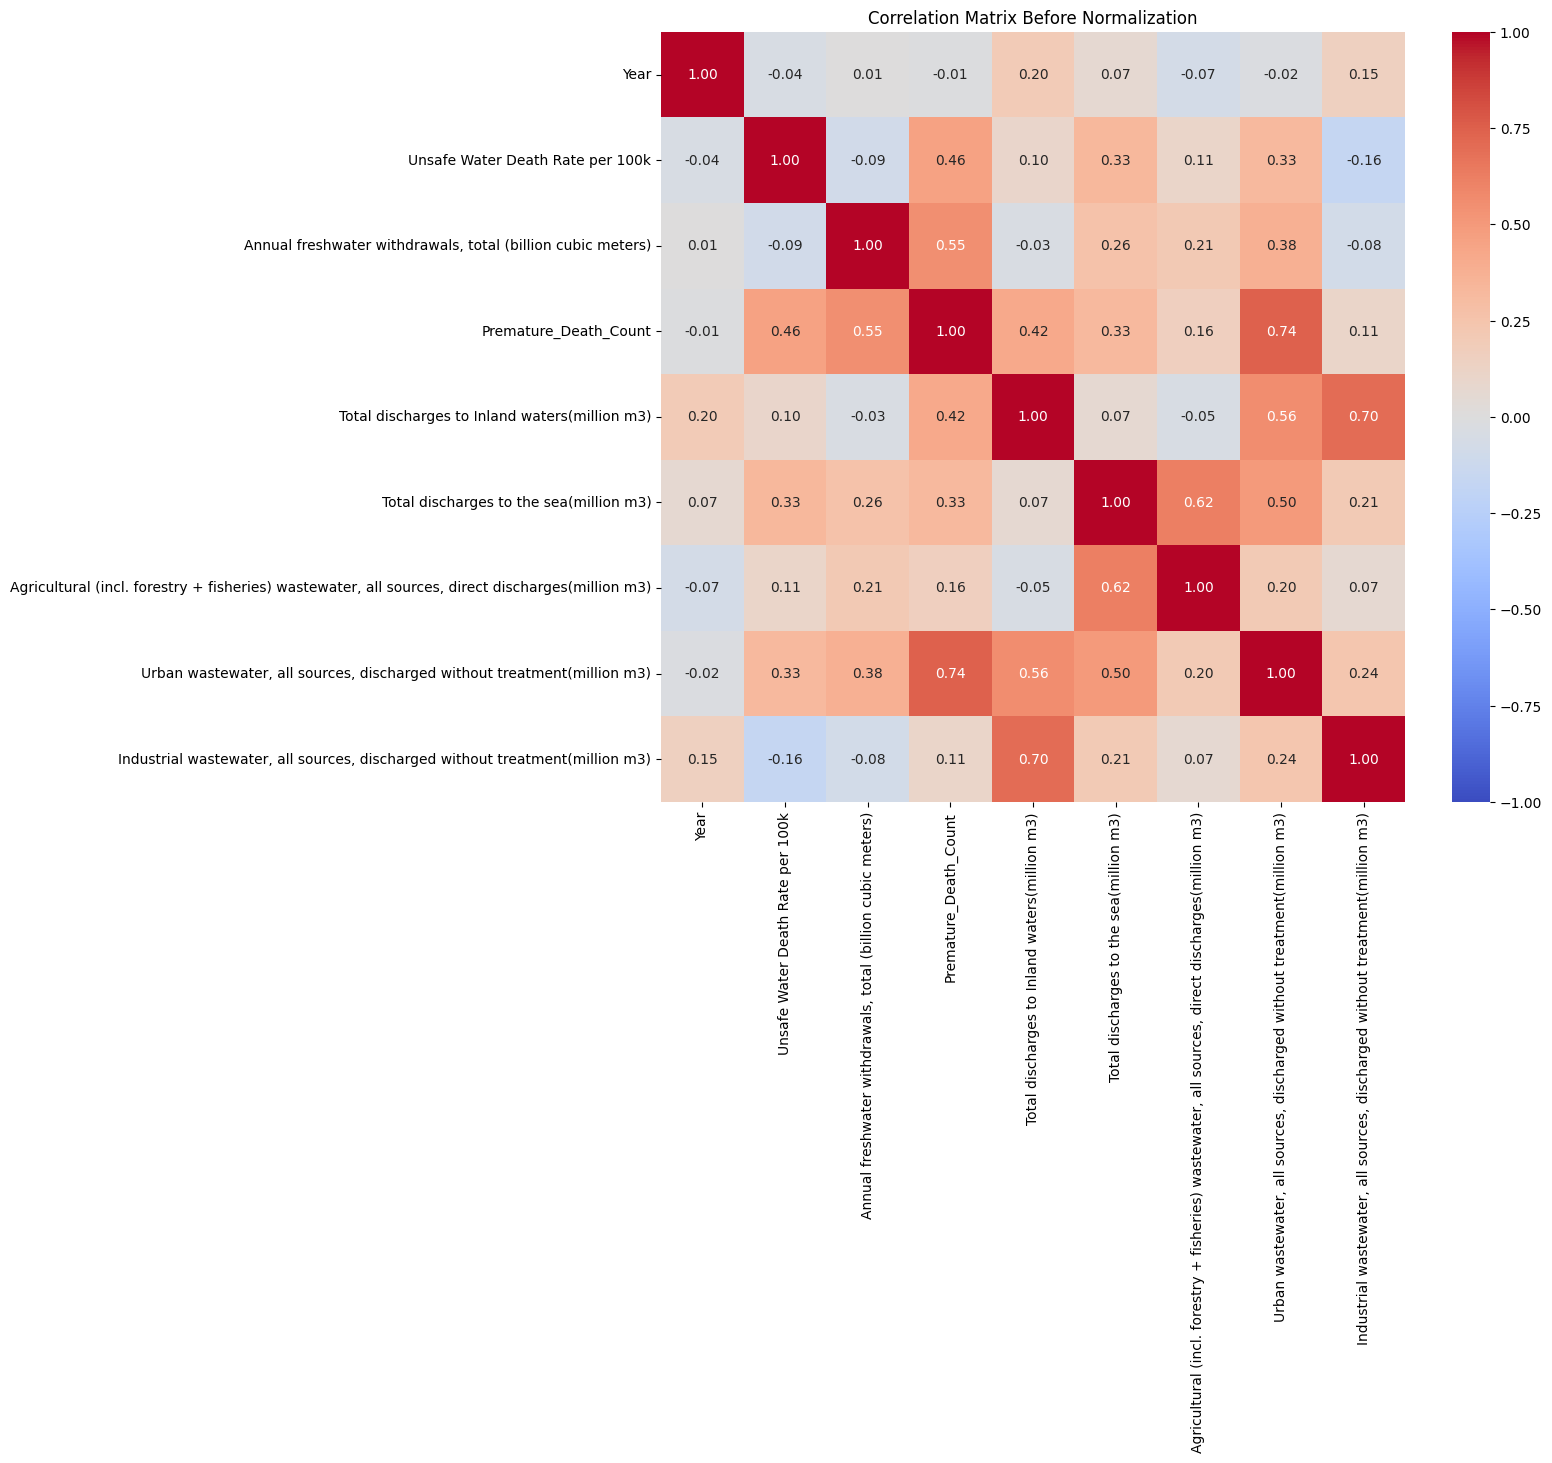

In [97]:
# Select only numerical columns for correlation analysis
numerical_data = data.select_dtypes(include=[pd.np.number])  # Using pd.np.number to avoid deprecation warnings

# Calculate correlation matrix
corr_matrix = numerical_data.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Before Normalization')
plt.show()


In [98]:
from sklearn.linear_model import LinearRegression
X = data[['Total discharges to Inland waters(million m3)']] # Predictor
y = data['Premature_Death_Count'] # Target
# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X, y)
# Extracting the coefficient and intercept
coefficient = model.coef_[0]
intercept = model.intercept_
# Displaying the results
coefficient, intercept


(0.02610761336573852, 45.179155800189704)

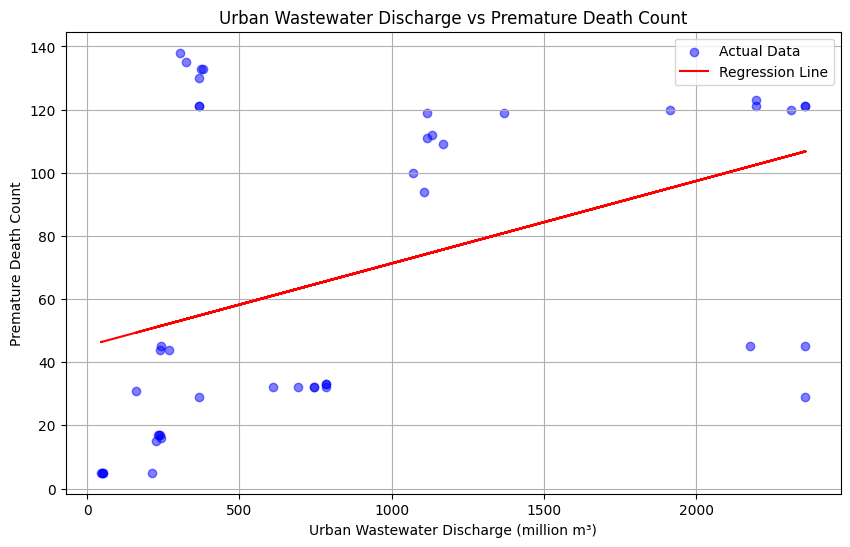

In [100]:
# Predict the values
y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(data['Total discharges to Inland waters(million m3)'], data['Premature_Death_Count'], color='blue', alpha=0.5, label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title('Urban Wastewater Discharge vs Premature Death Count')
plt.xlabel('Urban Wastewater Discharge (million m³)')
plt.ylabel('Premature Death Count')
plt.legend()
plt.grid(True)
plt.show()


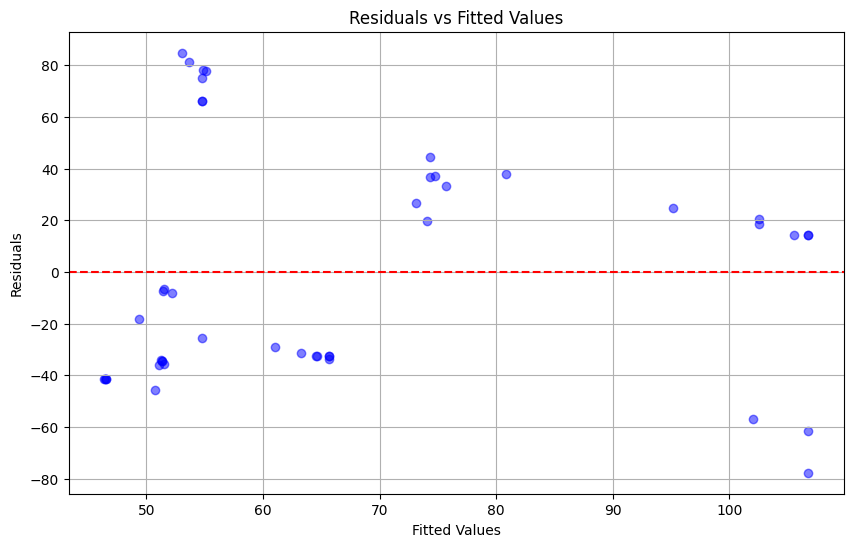

In [101]:
# Calculating residuas
residuals = y - y_pred

# Plotting Residuals vs Fitted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)

plt.show()


In [102]:
from sklearn.metrics import mean_squared_error

# Calculating the RMSE
rmse = mean_squared_error(y, y_pred, squared=False)

rmse


44.069027560839054